<a href="https://colab.research.google.com/github/twix-ps/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**


*   Author: Issa


###Project Overview

##Load and Inspect Data

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
fpath = "/content/drive/MyDrive/Dojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

Mounted at /content/drive


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

In [ ]:
# Getting the Rows & Columns count:
df.shape


(8523, 12)

In [ ]:
# Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Checking for duplicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

# None found, so won't drop anything

0

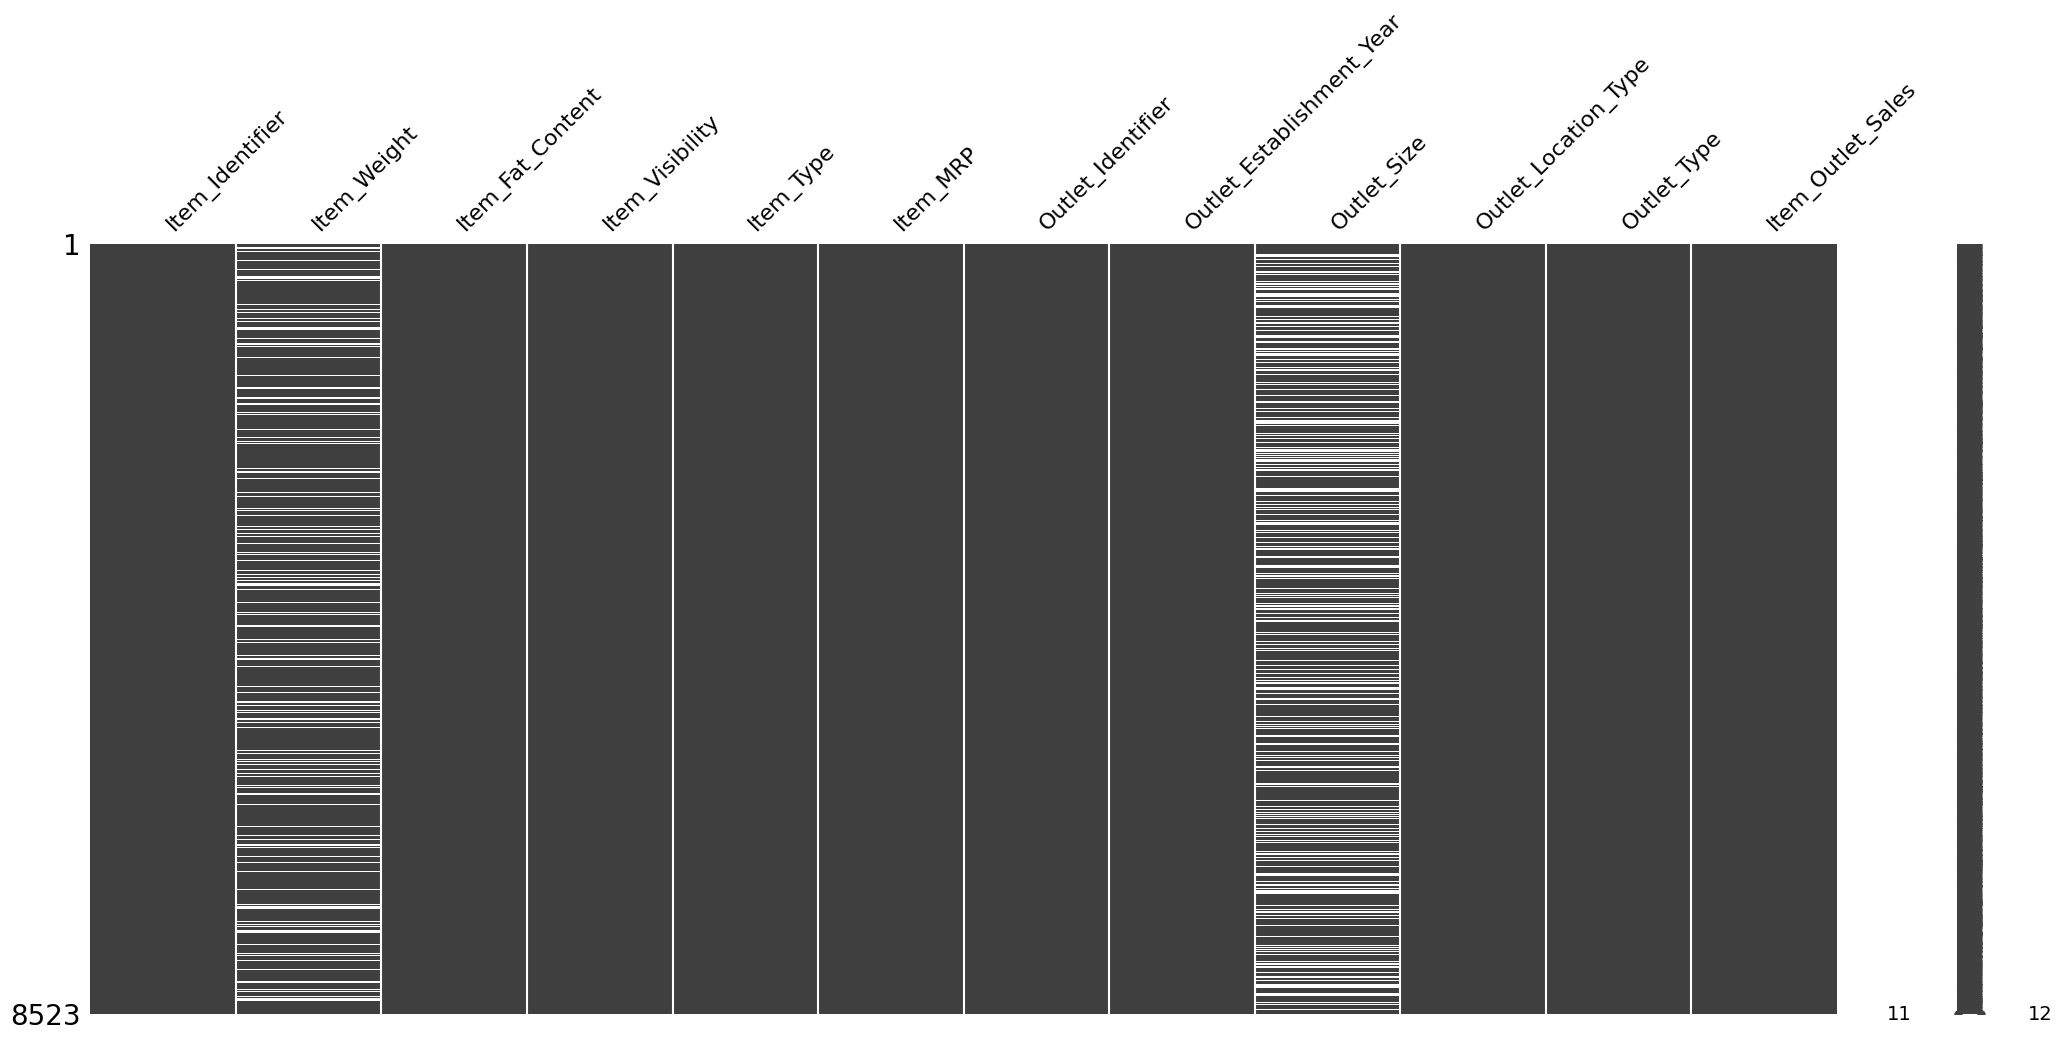

In [ ]:

# Visualize all the missing data

msno.matrix(df);

In [ ]:
# Checking for missing values and getting the percentages and sums
null_percent = df.isna().sum()/len(df) * 100
null_percent[null_percent>0]

# Item_Weight and Outlet_Size are missing in alot of rows, so replace with placeholder.
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode())

In [ ]:
# Re-check the missing values to ensure they're no longer missing
null_percent = df.isna().sum()/len(df) * 100
null_percent[null_percent>0]

Series([], dtype: float64)

In [ ]:
# Making sure all data is consistent
for column in df:
  print(f"{df[column].value_counts()}\n")

# Item_Fat_Content has mismatching values, so fix that:
replace_dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replace_dict)

print(f"New values for Item_Fat_Content: {df['Item_Fat_Content'].value_counts()}")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: count, Length: 416, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health

In [ ]:
# Numeric columns list
numeric = df.select_dtypes(include=np.number).columns.tolist()

for name in numeric:
  print(f"{name}'s statistics: \nMean: {df[name].mean()}\nMinimum: {df[name].min()}\nMaximum:{df[name].max()}\n  ")

Item_Visibility's statistics: 
Mean: 0.06613202877895108
Minimum: 0.0
Maximum:0.328390948
  
Item_MRP's statistics: 
Mean: 140.9927819781767
Minimum: 31.29
Maximum:266.8884
  
Outlet_Establishment_Year's statistics: 
Mean: 1997.8318667135984
Minimum: 1985
Maximum:2009
  
Item_Outlet_Sales's statistics: 
Mean: 2181.288913575032
Minimum: 33.29
Maximum:13086.9648
  


##Exploratory Data Analysis

### Histogram

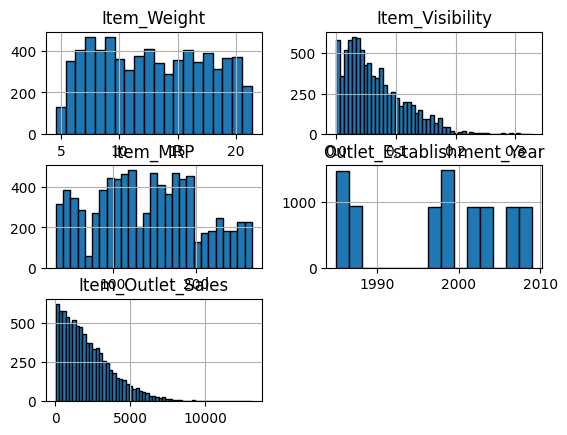

In [8]:
ax = df.hist(bins='auto', edgecolor='black')

### Boxplot

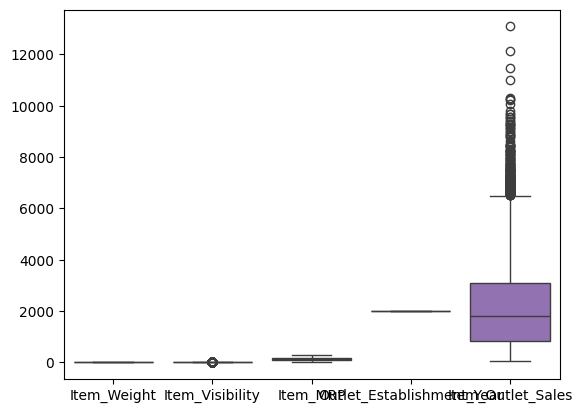

In [45]:
ax = sns.boxplot(data=df)

### Countplot

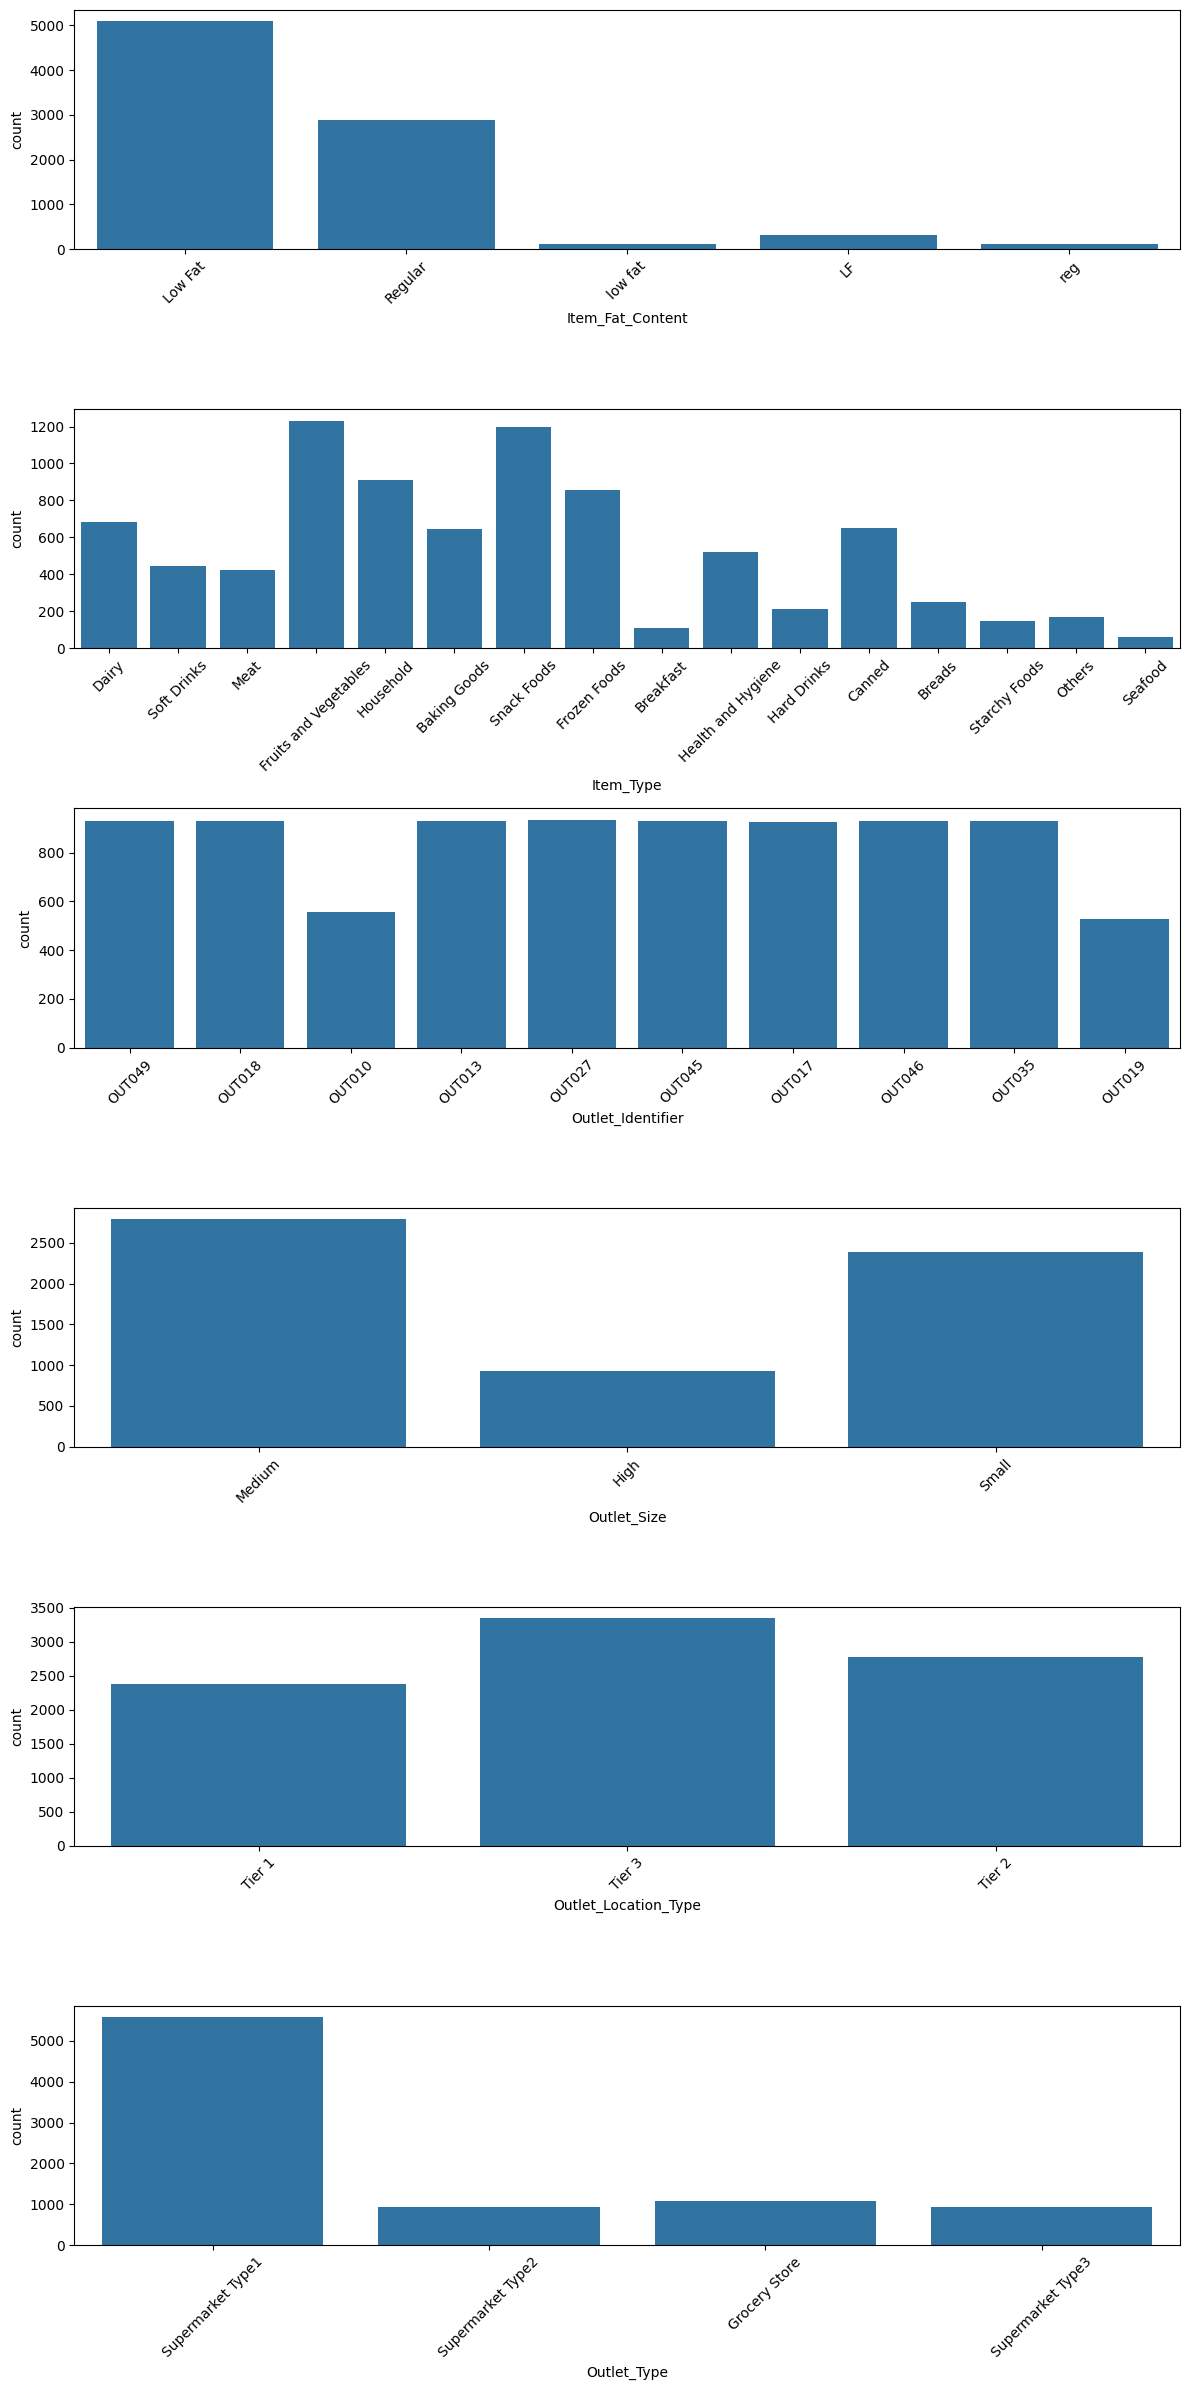

In [41]:
categorical = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(len(categorical), 1, figsize=(12, 4 * len(categorical)), sharex=False)

for i, column in enumerate(categorical):
  sns.countplot(data=df, x=column, ax=axes[i])
  for tick in axes[i].get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()

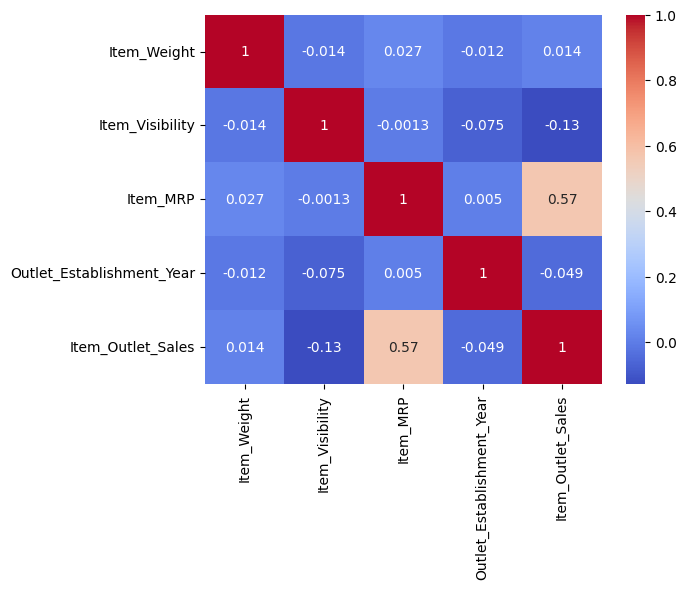

In [47]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

##Feature Inspection